# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [86]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from skimage import filters
import imageio
import cv2
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [53]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

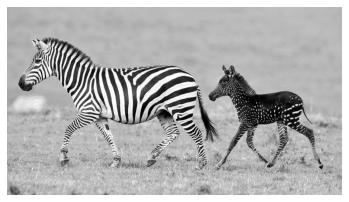

In [54]:
myimshow(zebra)

In [55]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

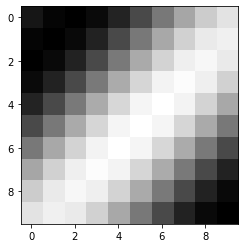

In [56]:
filtro = genGabor((10,10),0.5,1/4*np.pi)
plt.imshow(filtro,cmap='gray')


2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [57]:
immagine_risultato = convolve?

In [ ]:
immagine_risultato = convolve

In [58]:
immagine_risultato = convolve

In [59]:
immagine_risultato = convolve

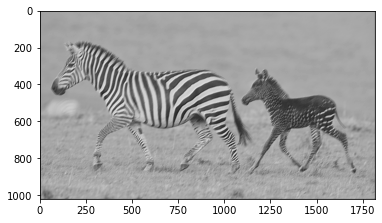

In [60]:
immagine_risultato = convolve(zebra,filtro,mode='constant')
plt.imshow(immagine_risultato, cmap='gray')

il filtro sembrerebbe ridurre la luminosità ed effettuare un leggero smoothing.
infatti il filtro è dato dalla combinazione di un filtro gaussiano con una sinusoide.
inoltre mette in evidenza le componenti ad alta frequenza.

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

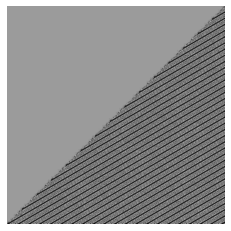

In [61]:
gabor =  imageio.imread('gabor1.jpg')
myimshow(gabor)
filtro = genGabor((3,3),0.9,1/3*np.pi)
immagine_risultato = convolve(gabor,filtro,mode='constant')
plt.imshow(immagine_risultato, cmap='gray')


4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

il filtro di Sobel, poichè può essere utilizzato per calcolare la derivata sia sull'asse x che sull'asse y permettendo di calcolare i cambi di intensità del colore sui vari pixel, applicando il fitro.
Effettuando il filtro sull'asse x, si possono apprezzare i cambi di intensità che permetto di individurare i contorni verticali mentre sull'asse y si individuano i contorni orizzontali, quindi combinando i due filtri riusciamo a individuare i contorni dell'immagine. Un altro filtro interessante è il Laplaciano che però utilizza le derivate seconde per individuare i contorni.


# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

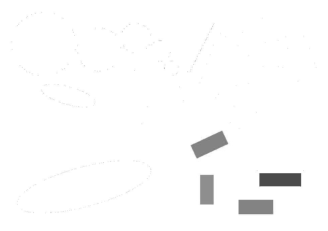

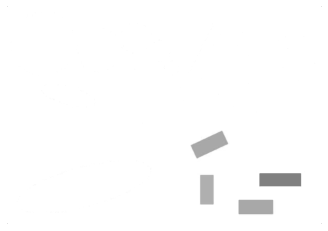

In [76]:
rettangoli =  rgb2gray(imageio.imread('rettangoli.jpg'))
myimshow(rettangoli)
def median_filter(image, kernel_width=3,kernel_height=3):
    a = kernel_width//2
    b = kernel_height//2
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):    
            output[y, x]=np.median(image_padded[y: y+kernel_width, x: x+kernel_height])

    return output
image_median = median_filter(rettangoli,3,3)


myimshow(np.array(image_median))

il filtro utilizzato è il filtro mediana che non fa altro che associare il valore mediano sulla porzione dell'immagine a cui viene applicato il filtro, cioè prende i valori della porzione a cui applico il filtro li gestisco come array unidimensionale, li ordino e prendo il valore che si trova nella posizione centrale, e quello sarà il valore da inserire, in questo modo riesco ad eliminare il rumore presente nell'immagine.

# Esercizio 3

Scrivere un filtro 3x3 che restituisce un valore positivo se la media dei pixel rispetto all'asse verticale è superiore al valore del centro, e negativo altrimenti. Cosa calcola tale filtro? Illustrarlo su un'immagine

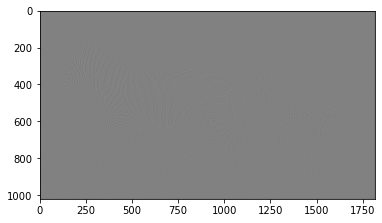

In [82]:
filtro = [[1/6,0,1/6],
         [1/6,-1,1/6],
          [1/6,0,1/6]]
immagine_risultato = convolve(zebra,filtro,mode='constant')
plt.imshow(immagine_risultato, cmap='gray')

il filtro calcola la differenza tra l'intensità media di colori e il valore su cui centro il filtro.
Avremo che restituirà il colore più nero nel momento in cui la media dei valori dei pixel in verticale coincide con il valore del pixel centrale. Quindi i risultati si apprezzano nelle immagini in cui le varie finestre presanto diverse intensità di colori, infatti nell'immagine della zebra si intravedono le strisce sul corpo.


# Esercizio 4

Eliminare i cerchi verdi dalla figura

![](forme.jpg)

(648, 936, 3)


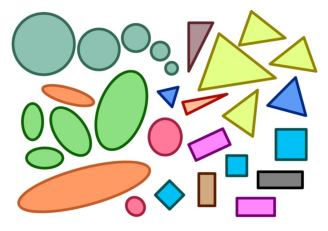

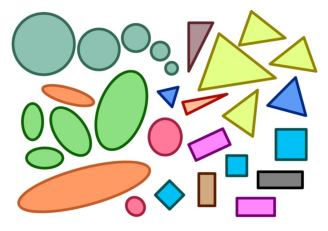

In [107]:
forme = imageio.imread('forme.jpg')
myimshow(forme)
print(forme.shape)

#forme[:,:,:]==(0,255,0) <= 255
myimshow(forme)


# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (15, 15) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

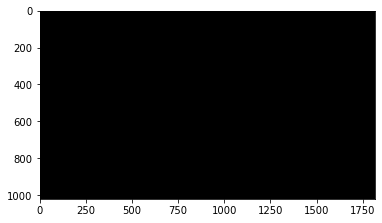

In [102]:


h,w=zebra.shape[:2]
M1 = [[1,0,1],[0,1,50]]
M = cv2.getRotationMatrix2D((15,15),45,1.0)*M

immagine_result = cv2.warpAffine(zebra,M,(w,h))
plt.imshow(immagine_result)


prima definisco la matrice per effettura la rotazione di 45 gradi dopodichè la moltiplico per effettura la traslazione cosi da ottenere un'unica matrice che combina le due trasformazioni preservando l'ordine delle varie trasformazioni richieste.